PCA_Try1

In [1]:
"""
Imports
"""
import pandas as pd
import numpy as np
import graphviz
import io
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
from bokeh.models import Legend
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


**Data**

In [2]:
df = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Imputation_Compare/postimp_feat_.csv')

In [3]:
df.drop(['Homozygous_Reference_GTcons'], axis=1, inplace = True)
df.drop(['Heterozygous_Variant_GTcons'], axis=1, inplace = True)
df.drop(['Homozygous_Variant_GTcons'], axis=1, inplace = True)
df.drop(['GTcons'], axis=1, inplace = True)
df.drop(['GTsupp'], axis=1, inplace = True)
df.drop(['predicted_GTcons_label'], axis=1, inplace = True)

In [4]:
df['chrom'].replace('X', 23, inplace=True)
df['chrom'].replace('Y', 24, inplace=True)

**PCA**

[PCA Note - Digits Example](https://youtu.be/Rjz3OfmnhUU?t=436)

In [5]:
# Standardize Data
# Transformation of the data onto unit scale (mean=0 and variance=1)
df_std = StandardScaler().fit_transform(df)
df_std.shape

(4041, 175)

In [6]:
# # Another way to normalize data
# # normalize data
# df_norm = (df - df.mean()) / df.std()

In [7]:
pca=PCA(n_components=10)
pca.fit_transform(df_std)
pca

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca.explained_variance_

array([ 19.58837221,  18.9685563 ,  12.2204867 ,   8.69002517,
         7.41203388,   5.50008549,   4.68269886,   4.39750978,
         4.3057987 ,   3.26356048])

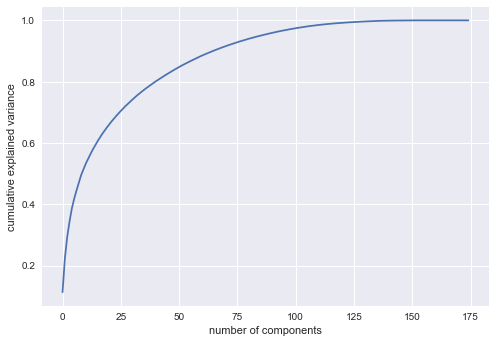

In [9]:
pca = PCA().fit(df_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [10]:
# Determine the number of components that explain 98% of the varaince in the data
clf = PCA(0.95)
X_tran = clf.fit_transform(df_std)
print('Number of components that explain 95% of the variance: {:.1f}'.format(clf.n_components_)) 

Number of components that explain 95% of the variance: 86.0


In [11]:
print ('This means that {:.1f} components can be ignored'.format(175-(clf.n_components_)))

This means that 89.0 components can be ignored


In [12]:
df = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Imputation_Compare/postimp_feat_.csv')
df.drop(['Homozygous_Reference_GTcons'], axis=1, inplace = True)
df.drop(['Heterozygous_Variant_GTcons'], axis=1, inplace = True)
df.drop(['Homozygous_Variant_GTcons'], axis=1, inplace = True)
df.drop(['GTcons'], axis=1, inplace = True)
df.drop(['GTsupp'], axis=1, inplace = True)
df.drop(['predicted_GTcons_label'], axis=1, inplace = True)

df['chrom'].replace('X', 23, inplace=True)
df['chrom'].replace('Y', 24, inplace=True)


In [13]:
pca2=PCA(n_components=2)
c = pca2.fit(df_std)
d = c.components_
d.shape

(2, 175)

In [14]:
# pd.DataFrame(d, columns=['PC-1', 'PC-2'], index=df.columns)
# df = pd.DataFrame(a, index=a[:,0], columns=['A', 'B','C','D'])
df9 = pd.DataFrame(d[:,:])
df9

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,0.082911,0.051874,0.159338,0.079319,0.084512,0.156972,0.058639,0.036881,0.030545,-0.026877,...,-0.056018,-0.054905,-0.024789,0.0,0.0,0.019361,-0.019709,0.003691,0.153397,-0.038041
1,-0.146198,-0.098850,-0.095256,-0.141116,-0.137425,-0.095267,-0.013697,0.004517,-0.016528,-0.035224,...,0.096942,0.122123,0.168136,-0.0,-0.0,0.052485,0.036277,-0.001642,0.106358,-0.016778


In [15]:
df10 = df9.T
df10.index=df.columns
df10.rename(columns={0: 'PC-1'}, inplace=True)
df10.rename(columns={1: 'PC-2'}, inplace=True)
df10['PC-1'] = df10['PC-1'].abs()
df10['PC-2'] = df10['PC-2'].abs()
df11 = df10.sort('PC-1', ascending=False)
df11

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,PC-1,PC-2
Ill300x.alt_count,0.171168,0.085526
Ill300x.alt_reason_alignmentScore,0.164612,0.085854
Ill250.alt_count,0.159338,0.095256
Ill250.alt_reason_alignmentScore,0.156972,0.095267
tandemrep_cnt,0.153397,0.106358
IllMP.ref_count,0.140314,0.140962
IllMP.amb_insertSize_std,0.137995,0.092613
TenX.HP1_alt_count,0.137354,0.071635
TenX.HP2_alt_count,0.137313,0.052552
Ill300x.amb_insertSize_std,0.137305,0.116138


**TSNE**

In [16]:
ncomps = 86
pca=PCA(n_components=ncomps)
Y = pca.fit_transform(df_std)
dfpca = pd.DataFrame(Y, columns=['c{}'.format(c) for c in range(ncomps)], index=df.index)

In [17]:
tsne = TSNE(n_components=2, random_state=0)
Z = tsne.fit_transform(dfpca)
dftsne = pd.DataFrame(Z, columns=['x','y'], index=dfpca.index)

In [18]:
p = Scatter(dftsne, x='x', y='y', title='HG002 INS: tSNE')
show(p)

In [19]:
#Size Bins
bins = [20,50,100,300,400,500,1000,6000,500000]
df['Size'] = df['Size'].abs()
group_names_size = ['20-49', '50-99', '100-299', '300-399', '400-499', '500-999', '1000-5999', '6000+']
df['size_bin'] = pd.cut(df['Size'], bins, labels=group_names_size)
dftsne['size_bin'] = df['size_bin']

In [20]:
p = Scatter(dftsne, x='x', y='y', color='size_bin', title='HG002 Size', legend="top_left")
show(p)

In [21]:
#Ill300x Alt Count Bins
bins = [0,50,100,250,500,1000,5000]
group_names_size = ['0-50', '50-100', '100-250', '250-500', '500-1000', '1000-5000']
df['300x_bin'] = pd.cut(df['Ill300x.alt_count'], bins, labels=group_names_size)
dftsne['300x_bin'] = df['300x_bin']

In [22]:
p = Scatter(dftsne, x='x', y='y', color='300x_bin', title='HG002 Ill300x Alt Count', legend="top_left")
show(p)

In [23]:
#Tandem Repeat Counts
bins = [0,1,2,3,4,5,10,20,50,110]
group_names_size = ['0-1', '1-2','2-3','3-4','4-5','5-10', '10-20', '20-50', '50-110']
df['TR_cnt_bin'] = pd.cut(df['tandemrep_cnt'], bins, labels=group_names_size)
dftsne['TR_cnt_bin'] = df['TR_cnt_bin']

In [24]:
p = Scatter(dftsne, x='x', y='y', color='TR_cnt_bin', title='Tandem Repeat Count', legend="top_left")
show(p)

In [25]:
# DBSCAN with tSNE data
dbscan = DBSCAN()
labels = dbscan.fit_predict(Z)
print("Unique labels: {}".format(np.unique(labels)))
dftsne['clusterLabel'] = labels

Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]


In [26]:
dbscan = DBSCAN(min_samples=9)
labels = dbscan.fit_predict(Z)
print("Unique labels: {}".format(np.unique(labels)))
dftsne['clusterLabel'] = labels
dftsne['PC-1'] = df['Ill300x.alt_count']
dftsne['Size'] = df['Size'].abs()


df['clusterLabel'] = labels

Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]


In [27]:
p = Scatter(dftsne, x='x', y='y', color='clusterLabel', title='Cluster Labels', legend="top_left")
show(p)

In [28]:
output_notebook()

Loading BokehJS ...

In [29]:
'''
Question:
Bokeh Scatter Plot 
Display each unique label with a different color
'''
output_notebook()


from bokeh.models import HoverTool
import itertools 
from bokeh.plotting import ColumnDataSource
# select a palette
from bokeh.palettes import Dark2_5 as palette
# create a color iterator
colors = itertools.cycle(palette)

x = dftsne['x']
y = dftsne['y']

j = dftsne['clusterLabel']
clusters_colors = zip(set(dftsne['clusterLabel']), colors)
colors = [color for index, color in clusters_colors]
p = figure()

hover = HoverTool(
        tooltips=[
            ("desc", "@desc"),
            ("(x,y)", "($x, $y)"),
        ]
    )
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            desc=j,
        )
    )

p.scatter('x', 'y', source=source,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)

show(p) 

Loading BokehJS ...

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning:


Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.


/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/bokeh/models/sources.py:81: BokehUserWarning:

ColumnDataSource's columns must be of the same length



In [30]:
sns.set_style("white")


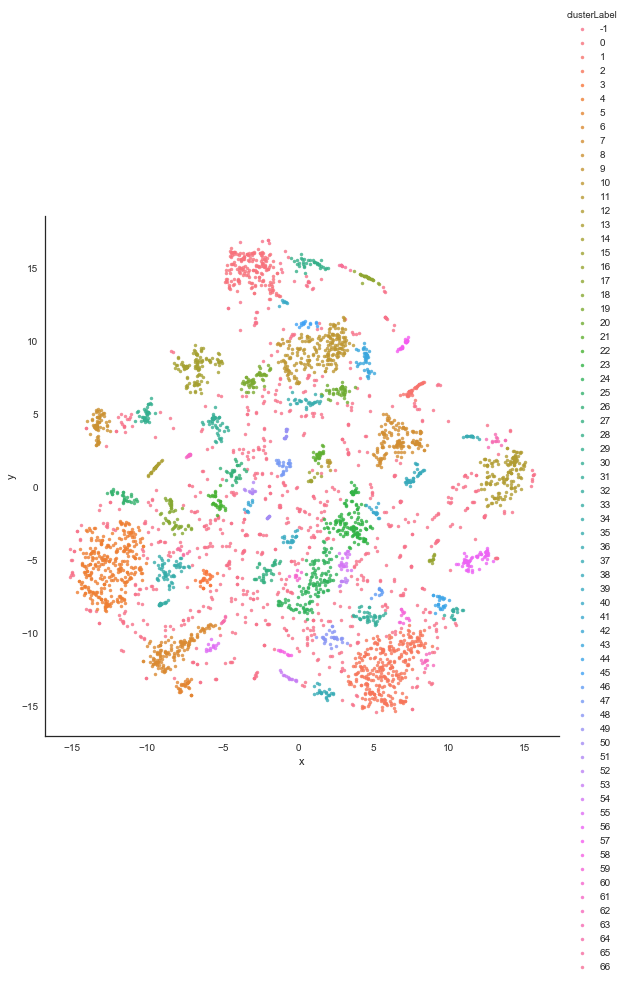

In [31]:

g = sns.lmplot("x", "y", data=dftsne, hue='clusterLabel', fit_reg=False, scatter_kws={"marker": "D","s": 12}, legend=True, size=8)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show(g)

In [32]:
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



In [33]:
from bokeh.models import Legend
x = dftsne['x']
y = dftsne['y']
samp = dftsne['clusterLabel']
samp1 = dftsne['Size']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
            samp1=samp1,
        )
    )

hover = HoverTool(
        tooltips=[
            ("Group ID", "@clusterLabel"),
            ("Size", "@Size"),
 
        ]
    )

s = Scatter(dftsne, x='x', y='y', color='clusterLabel', palette=palettes.Category20[20],tools=[hover, 'pan', 'wheel_zoom', 'save'], legend=False)


# s.legend.orientation = "horizontal"
# minS = df['minSample10']
# legend = Legend(items=minS, location=(0, -30))
# s.add_layout(legend, 'right')
# legend = Legend(items=legend_it, location=(0, -60))
# legend.click_policy="mute"
# r1 = p2.asterisk(np.array([1,2,3]), np.array([3,2,1])
# r2 = p2.line([1,2,3,4], [3,4,5,6])
# legend = Legend(items=[('Scatter', [s])], location=(0, -30))
# s.add_layout(legend, 'right')

show(s)

In [34]:
from bokeh.models import Legend
x = dftsne['x']
y = dftsne['y']
samp = dftsne['clusterLabel']
samp1 = dftsne['x']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("Group ID", "@clusterLabel"),
            ("Label", "$x"),
        ]
    )

s = Scatter(dftsne, x='x', y='y', color='clusterLabel', palette=palettes.Category20[20],tools=[hover, 'pan', 'wheel_zoom', 'save'], legend=False)


# s.legend.orientation = "horizontal"
# minS = df['minSample10']
# legend = Legend(items=minS, location=(0, -30))
# s.add_layout(legend, 'right')
# legend = Legend(items=legend_it, location=(0, -60))
# legend.click_policy="mute"
# r1 = p2.asterisk(np.array([1,2,3]), np.array([3,2,1])
# r2 = p2.line([1,2,3,4], [3,4,5,6])
# legend = Legend(items=[('Scatter', [s])], location=(0, -30))
# s.add_layout(legend, 'right')

show(s)

In [35]:
from bokeh.models import Legend
x = dftsne['x']
y = dftsne['y']
samp = dftsne['clusterLabel']
samp1 = dftsne['x']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("Group ID", "@clusterLabel"),
            ("Label", "$x"),
        ]
    )
p = figure(toolbar_location="above")
s = p.Scatter(dftsne, x='x', y='y', color='clusterLabel', palette=palettes.Category20[20],tools=[hover, 'pan', 'wheel_zoom', 'save'])


# s.legend.orientation = "horizontal"
# minS = df['minSample10']
# legend = Legend(items=minS, location=(0, -30))
# s.add_layout(legend, 'right')
# legend = Legend(items=legend_it, location=(0, -60))
# legend.click_policy="mute"
# r1 = p2.asterisk(np.array([1,2,3]), np.array([3,2,1])
# r2 = p2.line([1,2,3,4], [3,4,5,6])
legend = Legend(items=[('Scatter', [s])], location=(0, -30))
s.add_layout(legend, 'right')

show(s)

AttributeError: 'Figure' object has no attribute 'Scatter'

In [41]:
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.io import output_notebook
import bokeh.palettes as palettes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fancyimpute import KNN
from matplotlib import pyplot
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from bokeh.plotting import figure, show
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from bokeh.models import Legend
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, output_file, show, ColumnDataSource
# Import Bokeh modules for interactive plotting
import bokeh.charts
import bokeh.charts as bch
import bokeh.charts.utils
import bokeh.io
import bokeh.models
import bokeh.palettes
import bokeh.plotting

# Display graphics in this notebook
bokeh.io.output_notebook()
TOOLS = [BoxSelectTool(), HoverTool()]

output_notebook()

Loading BokehJS ...

Loading BokehJS ...

In [44]:
#Specify data source
source = bokeh.models.ColumnDataSource(dftsne)

# What pops up on hover?
tooltips = [('Cluster_Label', '@clusterLabel'),
           ('Size', '@Size')]

# Make the hover tool
hover = bokeh.models.HoverTool(tooltips=tooltips)

# Create figure
p = bokeh.plotting.figure(background_fill='#DFDFE5', plot_width=650, 
                          plot_height=450)

p.xgrid.grid_line_color = 'white'
p.ygrid.grid_line_color = 'white'

# Add the hover tool
p.add_tools(hover)

# Populate glyphs
# p.scatter(x='x', y='y', color='Tech_Label_Agreement', size=7, alpha=0.5, source=source)

# bokeh.io.show(p)

scatter = bch.Scatter(dftsne, x='x', y='y',
                      color='Cluster_Label',
                      legend="top_right",
                      tooltips=tooltips
                     )

bch.show(scatter)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning:

Plot.background_fill was deprecated in Bokeh 0.11.0 and will be removed, use Plot.background_fill_color instead.



ValueError: expected an element of either Enum('aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey', 'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen'), Regex('^#[0-9a-fA-F]{6}$'), Tuple(Byte(Int, 0, 255), Byte(Int, 0, 255), Byte(Int, 0, 255)) or Tuple(Byte(Int, 0, 255), Byte(Int, 0, 255), Byte(Int, 0, 255), Percent), got 'Cluster_Label'

In [45]:
dftsne.to_csv('tsne_Data.csv', index=False)